In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from astropy.table import Table as Tb
%matplotlib notebook

In [2]:
from scipy import stats

In [3]:
# df = pd.read_excel("0617_300Microns_timeSeries.xlsx")
# df = pd.read_csv("Sample_0012022-06-17 11.47.22.877_A0000 test.csv")
with open('Sample_0012022-06-17 11.47.22.877_A0000 test.csv') as f:
    df = pd.read_csv(f)
df

,#Protocol Time Stamp(s),Data channel 1 (µm),Data channel 2 (µm),State channel 1
0,2022-06-17 11:47:22.705617,351.93326,2137.05266,0
1,2022-06-17 11:47:22.715217,351.93326,2137.05266,0
2,2022-06-17 11:47:22.724817,351.93362,2137.05266,0
3,2022-06-17 11:47:22.734417,351.93362,2137.05266,0
4,2022-06-17 11:47:22.744017,351.93302,2137.05266,0
...,...,...,...,...
224551,2022-06-17 12:23:18.391187,280.18309,2137.05266,0
224552,2022-06-17 12:23:18.400787,280.18333,2137.05266,0
224553,2022-06-17 12:23:18.410388,280.18309,2137.05266,0
224554,2022-06-17 12:23:18.419987,280.18309,2137.05266,0


In [4]:
time = pd.to_datetime(df["#Protocol Time Stamp(s)"])

In [5]:
deltaTime = time - time[0]

<IPython.core.display.Javascript object>


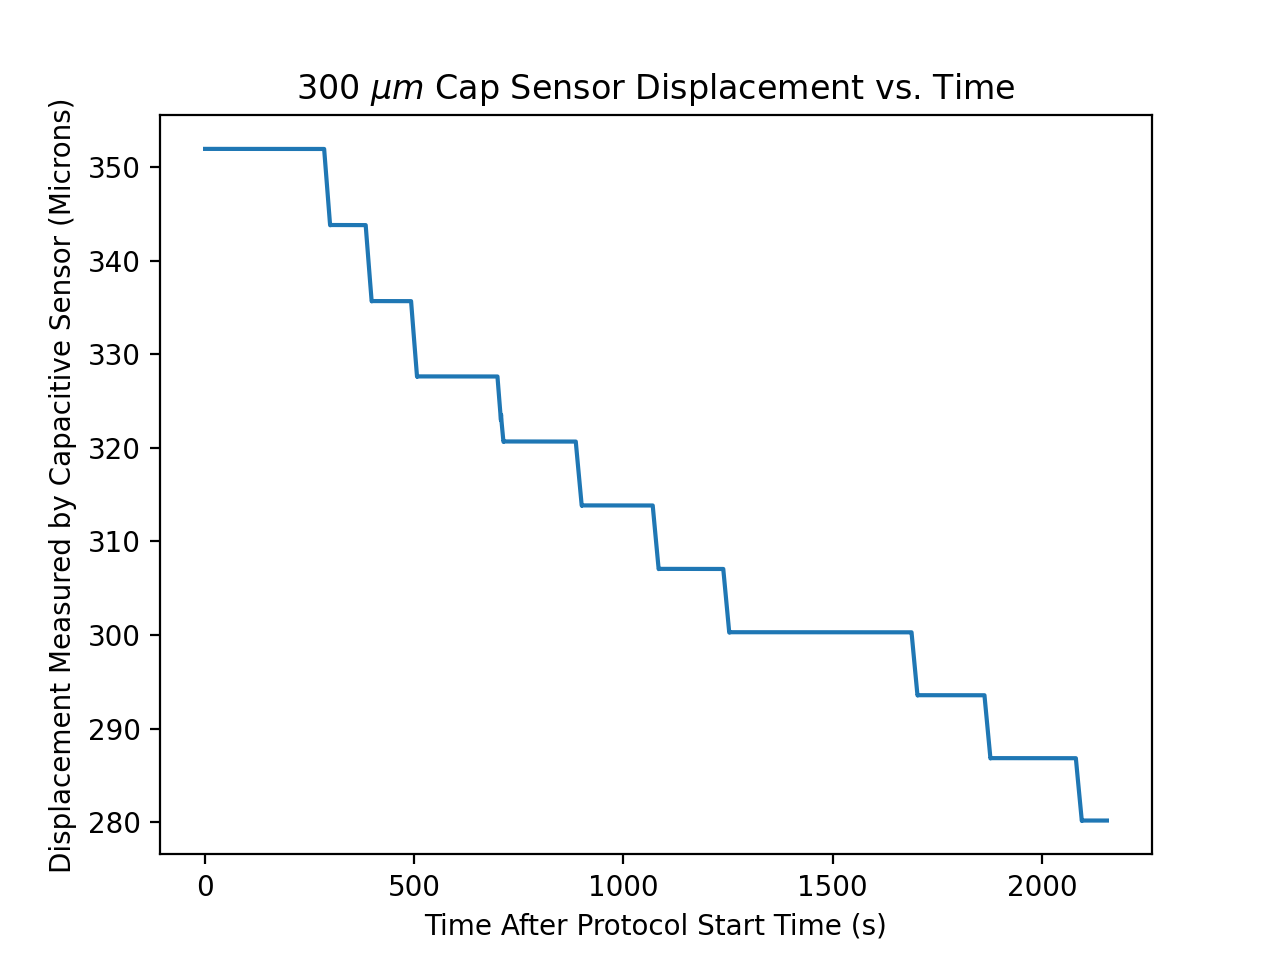

Text(0.5, 1.0, '300 $\\mu m$ Cap Sensor Displacement vs. Time')

In [19]:
plt.figure()
plt.plot(deltaTime.dt.total_seconds(),df[" Data channel 1 (µm)"])

plt.xlabel('Time After Protocol Start Time (s)')
plt.ylabel('Displacement Measured by Capacitive Sensor (Microns)')
plt.title('300 $\mu m$ Cap Sensor Displacement vs. Time')

<IPython.core.display.Javascript object>


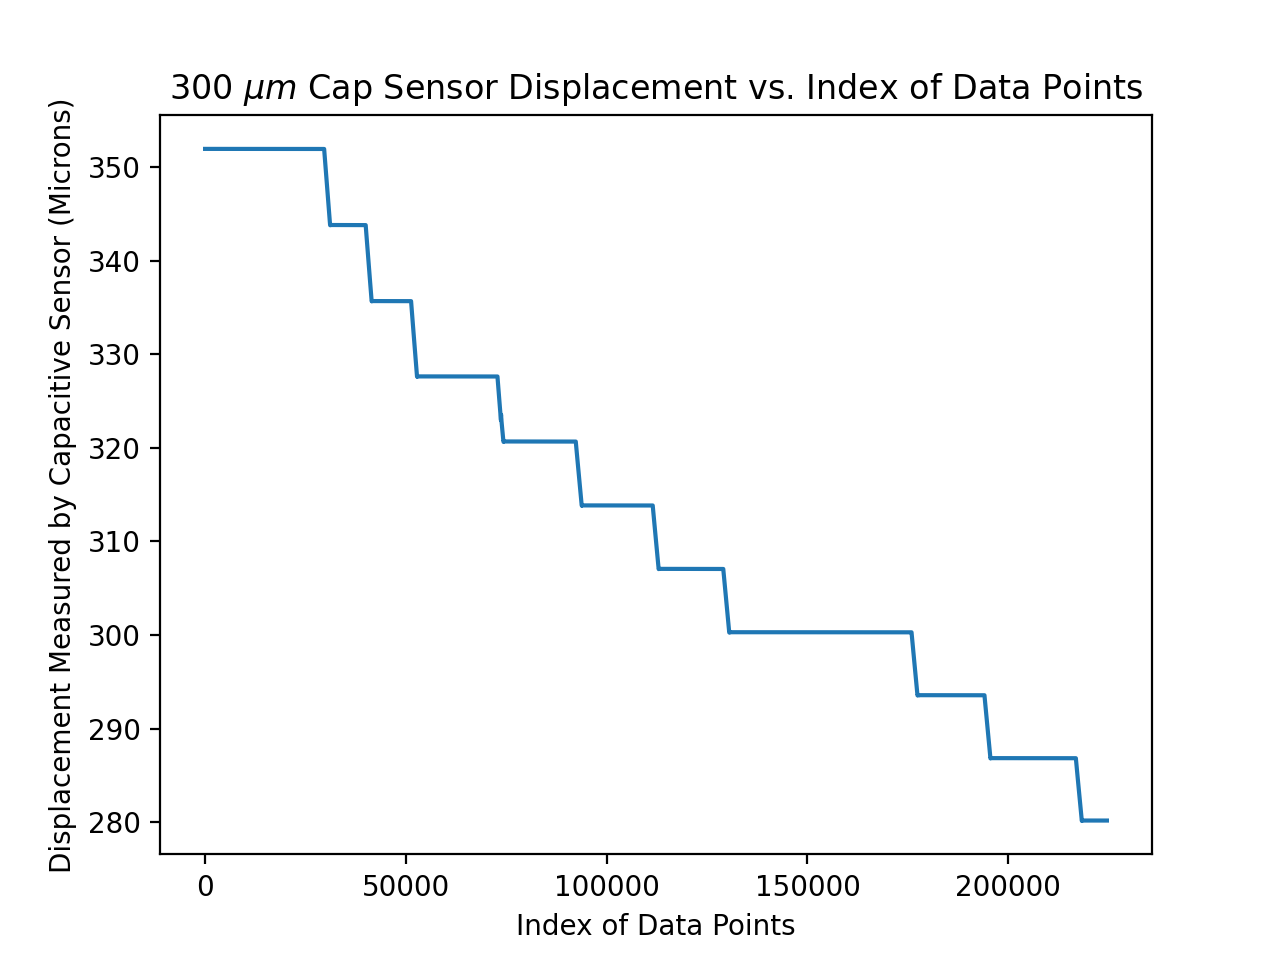

Text(0.5, 1.0, '300 $\\mu m$ Cap Sensor Displacement vs. Index of Data Points')

In [18]:
plt.figure()
plt.plot(df[" Data channel 1 (µm)"])
plt.xlabel('Index of Data Points')
plt.ylabel('Displacement Measured by Capacitive Sensor (Microns)')
plt.title('300 $\mu m$ Cap Sensor Displacement vs. Index of Data Points')

In [8]:
start=132000
end=175000

In [9]:
print(df[" Data channel 1 (µm)"][start:end].mean())
print(df[" Data channel 1 (µm)"][start:end].std())

300.3018045862524
0.001558832871389717


In [10]:
y = df[" Data channel 1 (µm)"][start:end]

In [11]:
x = (time[start:end] - time[start]).dt.total_seconds()

In [12]:
info = stats.linregress(x,y)

In [13]:
info

LinregressResult(slope=5.4939400384413395e-06, intercept=300.300670665517, rvalue=0.41998876360670684, pvalue=0.0, stderr=5.725096001017927e-08, intercept_stderr=1.3644369068369726e-05)

<IPython.core.display.Javascript object>


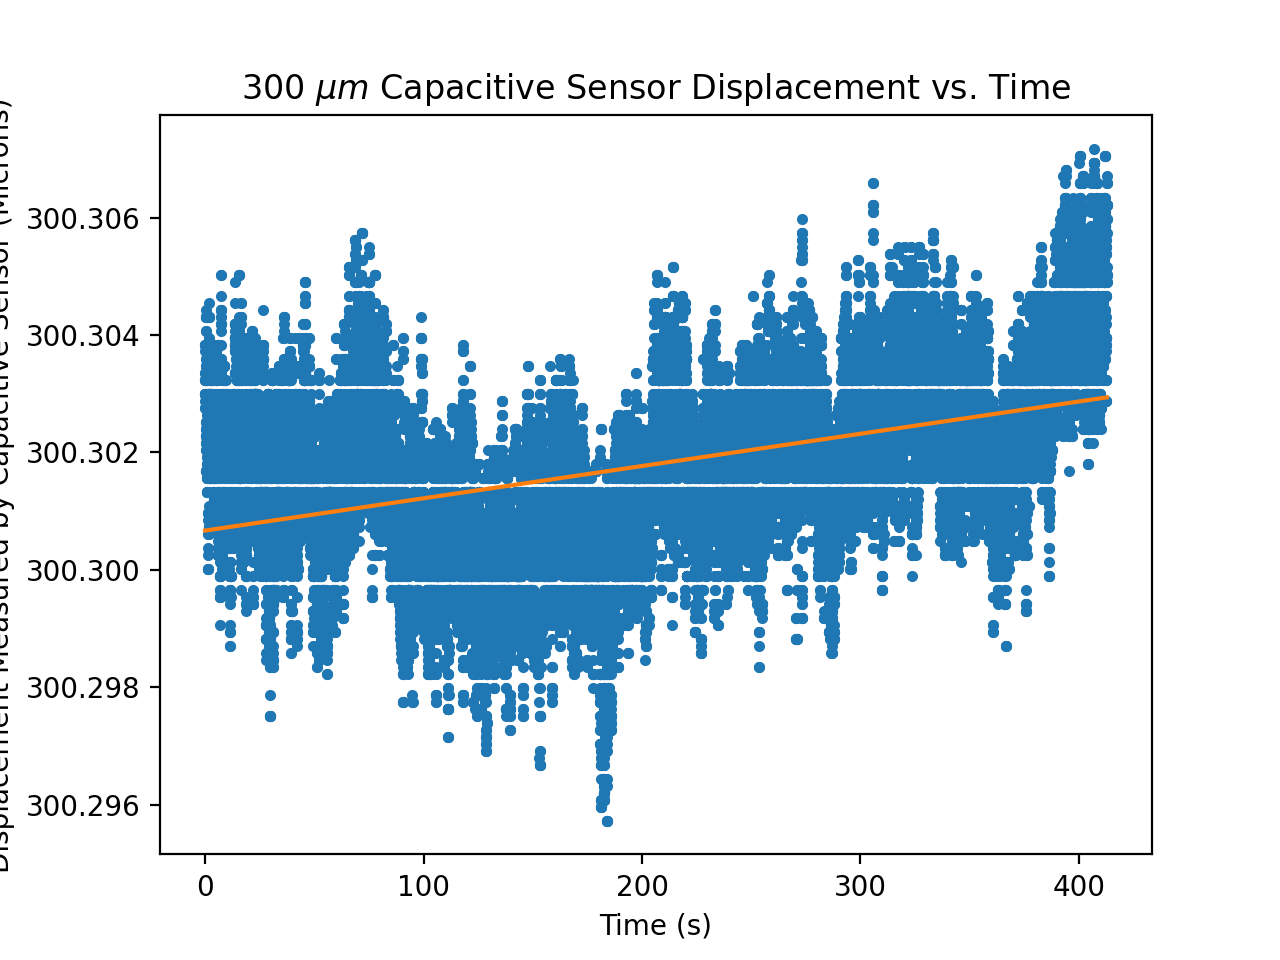

In [17]:
plt.figure()
plt.plot((time[start:end] - time[start]).dt.total_seconds(),df[" Data channel 1 (µm)"][start:end],".")
plt.plot(x,x*info.slope+info.intercept)

plt.xlabel('Time (s)')
plt.ylabel('Displacement Measured by Capacitive Sensor (Microns)')
plt.title('300 $\mu m$ Capacitive Sensor Displacement vs. Time')

plt.ticklabel_format(useOffset=False)